In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import numpy as np

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
mean = test_data.mean(axis=0)
std = test_data.std(axis=0)
test_data = (test_data - mean) / std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [5]:
# 회귀(예측)을 위한 모델은 loss와 metrics를 mse로 사용합니다.
from keras.optimizers import Adam

model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mae'])

c:\Users\inter\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
from keras.callbacks import EarlyStopping

history = model.fit(train_data, train_labels, batch_size=32, epochs=400, validation_split=0.2)

Epoch 1/400
11/11 [==============================] - 1s 21ms/step - loss: 566.1847 - mae: 21.9432 - val_loss: 615.9432 - val_mae: 23.0512
Epoch 2/400
11/11 [==============================] - 0s 5ms/step - loss: 530.7062 - mae: 21.1010 - val_loss: 576.3315 - val_mae: 22.1797
Epoch 3/400
11/11 [==============================] - 0s 4ms/step - loss: 490.1145 - mae: 20.0525 - val_loss: 523.1860 - val_mae: 20.9617
Epoch 4/400
11/11 [==============================] - 0s 4ms/step - loss: 433.7268 - mae: 18.6372 - val_loss: 450.0222 - val_mae: 19.2670
Epoch 5/400
11/11 [==============================] - 0s 4ms/step - loss: 361.2715 - mae: 16.7216 - val_loss: 354.8597 - val_mae: 16.8700
Epoch 6/400
11/11 [==============================] - 0s 4ms/step - loss: 269.3149 - mae: 14.2714 - val_loss: 251.9321 - val_mae: 13.9257
Epoch 7/400
11/11 [==============================] - 0s 4ms/step - loss: 176.6989 - mae: 11.3102 - val_loss: 152.7851 - val_mae: 10.3401
Epoch 8/400
11/11 [=====================

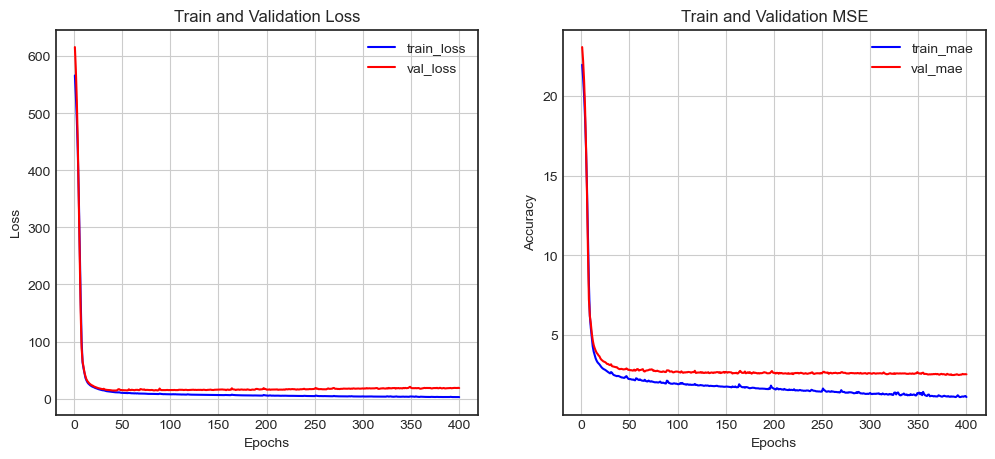

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MSE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [8]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_mae = model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 16.2832 - mae: 2.8085


In [9]:
print(np.round(test_labels[:10]))

test_predictions = model.predict(test_data[:10]).flatten()
print(np.round(test_predictions))

[ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
1/1 [==============================] - 0s 71ms/step
[ 7. 20. 22. 31. 27. 24. 28. 23. 19. 21.]


# 회고

### 모델 학습을 통해 실제값과 거의 비슷한 값을 얻어낼 수 있었다.
### 우선 노드에 나온 순서대로 코드를 작성하여 값을 얻어 내었다.
### 노드에 나온 순서대로 하다보니 수치를 수십번 조정하여 원하던 그래프를 얻어 낼수 있었다.(batch_size가 제일 영향이 높음)
### 추가로 실제값과 예측값을 비교하여 모델을 제대로 학습 시킬수 있었다.
### 다량의 데이터들을 모델학습하여 나온 결과값들을 쉽게 예측할 수 있었던 시간이었다.
### mae값을 최대한 실제값과 근사한 값을 도출해 내었다.
### 코드 부분은 구글링을 통해서 조금씩 수정하여 파일을 완성시켰다.
### 지난번 프로젝트보다 시간적여유가 조금 더 있었던거 같아 나름 좀 더 고민하고 생각할 수 있는 시간이 되었던거 같아 의미있었다.